# Import Libraries

In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import cv2 as cv
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.svm import SVC

In [26]:
alphabets = os.listdir('alphabets/english_alphabets/')
main_list = []
for i in range(len(alphabets)):
    sub_list=[]
    os.chdir('alphabets/english_alphabets/{}/'.format(alphabets[i]))
    imgs = os.listdir()
    for j in imgs:
        img = cv.imread(j,-1).flatten()
        sub_list.append([img,alphabets[i]])
    main_list.append(sub_list)
    os.chdir('..')
    os.chdir('..')
    os.chdir('..')

# Converting images to data frames

In [28]:
df_main_list = []
for i in range(26):
    df = pd.DataFrame(main_list[i])
    df_main_list.append(df)
df = pd.concat(df_main_list,axis=0,ignore_index=True)
df = pd.concat([df[0].apply(pd.Series),df[1]],axis=1,ignore_index=True) # Explode the lists
# shuffle all the  rows
df = df.sample(frac=1).reset_index(drop=True)

                                                     0  1
0    [2, 58, 255, 255, 112, 10, 0, 11, 10, 0, 0, 2,...  B
1    [3, 1, 6, 5, 77, 4, 13, 0, 0, 12, 0, 1, 0, 14,...  B
2    [2, 4, 0, 2, 6, 0, 0, 9, 3, 14, 0, 0, 0, 9, 0,...  B
3    [0, 0, 4, 14, 0, 0, 9, 5, 0, 24, 0, 0, 0, 17, ...  B
4    [0, 1, 0, 6, 6, 2, 5, 0, 13, 2, 0, 54, 255, 23...  B
..                                                 ... ..
267  [2, 5, 0, 0, 0, 3, 8, 3, 0, 0, 12, 52, 49, 115...  B
268  [0, 0, 4, 0, 0, 0, 39, 201, 199, 67, 71, 91, 2...  B
269  [0, 0, 0, 0, 0, 27, 250, 253, 69, 19, 46, 52, ...  B
270  [2, 0, 14, 0, 0, 8, 81, 255, 122, 0, 5, 0, 0, ...  B
271  [5, 0, 5, 11, 2, 20, 0, 3, 44, 27, 133, 252, 2...  B

[272 rows x 2 columns]


In [15]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156
0,0,2,7,5,0,12,0,6,0,0,...,0,0,6,0,1,0,2,0,0,V
1,0,0,0,0,3,0,0,12,0,0,...,0,0,0,0,0,0,0,0,0,R
2,0,18,0,9,6,0,2,1,13,0,...,0,0,0,0,0,0,0,0,0,T
3,3,0,2,0,1,1,0,7,3,10,...,0,0,0,0,0,0,0,0,0,P
4,0,4,3,0,3,13,11,1,15,0,...,249,250,240,211,38,13,0,18,0,C


# Split Train and test sets

In [17]:
y = df.pop(1156)
x_train,x_test,y_train,y_test = train_test_split(df,y,test_size=0.25)

# Exploratory Data Analysis

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6831 entries, 0 to 6830
Columns: 1156 entries, 0 to 1155
dtypes: uint8(1156)
memory usage: 7.5 MB


In [20]:
y.value_counts()

1156
A    391
N    350
P    336
C    297
O    292
F    284
L    282
D    274
B    272
X    272
S    263
M    261
Q    251
G    250
E    249
V    244
Z    240
R    239
W    237
U    237
H    229
J    227
T    226
K    217
Y    210
I    201
Name: count, dtype: int64

In [21]:
df.isnull().sum()

0       0
1       0
2       0
3       0
4       0
       ..
1151    0
1152    0
1153    0
1154    0
1155    0
Length: 1156, dtype: int64

<Axes: >

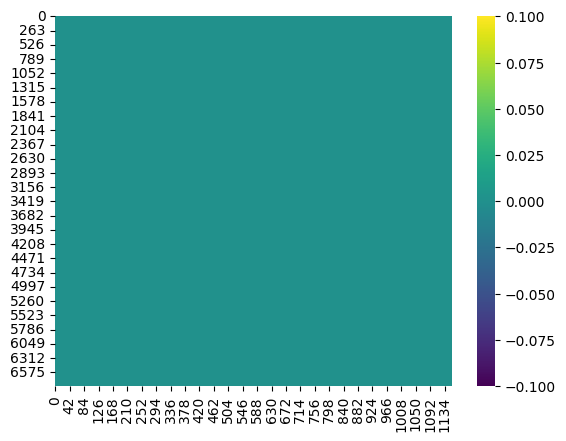

In [22]:
sns.heatmap(df.isnull(),cmap = 'viridis')

Yep There are no null values in the data as expected.

# Model Training, Prediction and Evaluation

In [24]:
svm_pipe = make_pipeline(StandardScaler(),SVC())
svm_pipe.fit(x_train,y_train)
y_pred = svm_pipe.predict(x_test)
print(f"ACCURACY : {accuracy_score(y_test,y_pred)}")

ACCURACY : 0.9004683840749415


It has a final accuracy of over 90%.